## Step 1 - Importing the data from csv file to Python

In [67]:
import pandas as pd
import seaborn as sns
def importing_data (url):
    import pandas as pd
    import seaborn as sns
    df = pd.read_excel(url)
    return(df)

In [68]:
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'

In [69]:
df = importing_data(url)

## Step 2 - Cleaning the data

2(1)- Before cleaning up the data, we had to establish our business model. We decided that our business would arrange vacations by the coast and also provide a wide range of insurance packages for such trips. One of these insurance packages is shark attack insurance. To establish the right price for this insurance package, we want to focus on important variables such as the vacation location, the sex of the person going on the trip, the age of the person, the season, the type of activities the person will perform, among others. Therefore, all information that does not provide this data must be removed from the dataframe.
2(2)- Secondly, we must delete all duplicate rows (if any).
2(3)- Lastly, Age is crucial for our business. As we will see later, the likelihood of a shark attack varies with the person's age, which means the price of the shark attack insurance may also vary accordingly. As a consequence, all rows that do not have any information regarding the age of the victim must be disregarded.

In [70]:
def df_clean_up (df_input):
    df = df_input.copy()
    # 2(1)
    df.drop(columns=["pdf"], inplace = True) 
    df.drop(columns=["href formula"], inplace = True)
    df.drop(columns=["href"], inplace = True)
    df.drop(columns=["Source"], inplace = True)
    df.drop(columns=["Unnamed: 21"], inplace = True)
    df.drop(columns=["Unnamed: 22"], inplace = True)
    df.drop(columns=["Unnamed: 11"], inplace = True)
    df.drop(columns=["Case Number.1"], inplace = True)
    df.drop(columns=["original order"], inplace = True)
    df.drop(columns=["Case Number"], inplace = True)
    df.drop(columns = ["Name"], inplace = True)
    df.drop(columns = ["Time"], inplace = True)
    # 2(2)
    df.dropna(how = "all", inplace = True) #We use this formula to get rid of all rows that solely contain null values
    # 2(3)
    df.dropna(subset = "Age", inplace = True)
    pd.set_option('display.max_rows', 50)

    return df


In [71]:
clean_df = df_clean_up(df)
clean_df

,Date,Year,Type,Country,State,Location,Activity,Sex,Age,Injury,Species
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,F,13,"Minor injuries to back, abdomen and legs",Tiger shark
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,F,11,Lacerations to left foot,3' to 4' shark
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,F,46,Leg bitten,Tiger shark
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,M,32,Calf of lower left leg injured,"Bull shark, 7'"
6,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,F,29,Right leg bitten,Bull shark
...,...,...,...,...,...,...,...,...,...,...,...
6885,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,Right leg lacerated & surgically amputated,Bull shark
6896,Before 1957,0.0,Provoked,CUBA,Havana Province,Cojimar,"Shark fishing, knocked overboard",M,50,"FATAL, hip bitten PROVOKED INCIDENT",NaN
6907,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Bull shark
6918,Early 1930s,0.0,Unprovoked,BELIZE,NaN,NaN,Standing,M,16,FATAL,12' tiger shark


## Step 3 - Formating

3(1)- In order to make the column names more consistant, they will all be lowercase and all extra-spaces will be removed.
3(2)- Making the Date column more consistant and removing all data from 1843 and 1980 (as they are too old to be valuable)
3(3)- Formating the "sex" and "types" columns so its elements are coherent and not redundant
3(4)- Making sure that all fatal accidents are called FATAL in the injury column
3(5)- The 0's in the activity column will be renamed to "undetermined"
3(6)- Turning the "age" column into a numerical column.
3(7)- Eliminating empty spaces at the beginning and end of strings in columns that are strings

In [72]:
def df_formating(df_input):
    df = df_input.copy()
# 3(1)
    df.columns = [i.replace(" ","").lower() for i in df.columns]
# 3(2)
    # Convert the 'Date' column to datetime format
    # Replace 'Date' with the actual name of the date column in your DataFrame
    # Assuming the date format is "02 Mar-2024"
    df["date_clean"] = pd.to_datetime(df['date'], format='%d-%b-%Y', errors='coerce')
    df.sample(50)
    df = df.dropna(subset=["date_clean"])
    # Display the DataFrame with the converted 'Date' column
    print("\nDataFrame with 'Date' column in datetime format:")
    #print(df)
    # Define the date range
    start_date = '1843-01-01'
    end_date = '1980-12-31'
    # Convert dates to datetime format
    start_date = pd.to_datetime(start_date,format="%Y-%m-%d")
    end_date = pd.to_datetime(end_date,format="%Y-%m-%d")
    # Filter out rows within the date range
    df_filtered = df[((df['date_clean'] >= end_date))]
    # to view updated data frame
    df_filtered.head(100)
 # 3(3)
    sexes = {" M": "M", "M ": "M", "lli":"other", "M x 2": "M", "N":"M", ".":"other"}
    df["sex"] = df["sex"].replace(sexes)
    types = {" Provoked": "Provoked", "Questionable": "Unconfirmed", "?": "Unconfirmed", "Unverified":"Unconfirmed", "Under investigation": "Unconfirmed", "Invalid": "Unconfirmed", "Boat": "Watercraft"}
    df["type"]=df["type"].replace(types)
 # 3(4)
    injury = {"FATAL": "FATAL", "fatal": "FATAL", "Fatal": "FATAL"}
    df["injury"] = df["injury"].replace(injury)
 # 3(5)
    activity = {"0": "Undetermined", }
    df["activity"] = df["activity"].replace(activity)
# 3(6)
    df["age"] = pd.to_numeric(df['age'], errors="coerce" )
# 3(7)
    for i in df:
      if df[i].dtype == "object":
         df[i] = df[i].str.strip()
      else:
         i
    pd.set_option('display.max_rows', 50)
    return df


In [73]:
format_df = df_formating(clean_df)
format_df



DataFrame with 'Date' column in datetime format:


,date,year,type,country,state,location,activity,sex,age,injury,species,date_clean
8,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,M,64.0,Leg bitten,White shark,2024-01-09
9,05-Jan-2024,2024.0,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,M,62.0,Provoked incident. Lacerations and puncture wo...,Raggedtooth shark,2024-01-05
14,24-Dec-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,M,46.0,Puncture wounds to right ankle,Broze whaler?,2023-12-24
70,23-Jun-2023,2023.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,F,NaN,Multiple puncture wounds to right thigh,NaN,2023-06-23
74,07-Jun-2023,2023.0,Unprovoked,BAHAMAS,Freeport,Shark Junction,Scuba diving,F,73.0,Calf severely bitten,Caribbean rreef shark,2023-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...
6711,17-Jan-1837,1837.0,Unprovoked,AUSTRALIA,New South Wales,Macleay River,Washing his feet,M,12.0,"FATAL Injured by shark, died of tetanus",NaN,1837-01-17
6723,26-Jul-1830,1830.0,Unprovoked,USA,Massachusetts,"Swampscott, Essex County","Fishing from dory, shark upset boat & he fell ...",M,52.0,FATAL,NaN,1830-07-26
6730,28-Sep-1828,1828.0,Unprovoked,SIERRA LEONE,Western Area,"River Sierra Leone, 35 miles upriver from Fre...","British ship, Britannia, was loading lumber. ...",M,17.0,"Left arm severed 2.5"" from elbow, groin, abdom...",NaN,1828-09-28
6748,11-May-1817,1817.0,Unprovoked,SRI LANKA,Western Province,Colombo,Swimming,M,22.0,FATAL,NaN,1817-05-11


## Step 4 - Testing hypothesis


To start, we want to know the most common age among those who have been attacked by sharks. We create a graph to better see the data, and another graph with the most relevant numbers.

(    age  size
 0  17.0   160
 1  18.0   141
 2  19.0   140
 3  20.0   136
 4  16.0   135
 5  15.0   132
 6  22.0   116
 7  21.0   111
 8  14.0   107
 9  25.0   104,
 <seaborn.axisgrid.FacetGrid at 0x14e796990>)

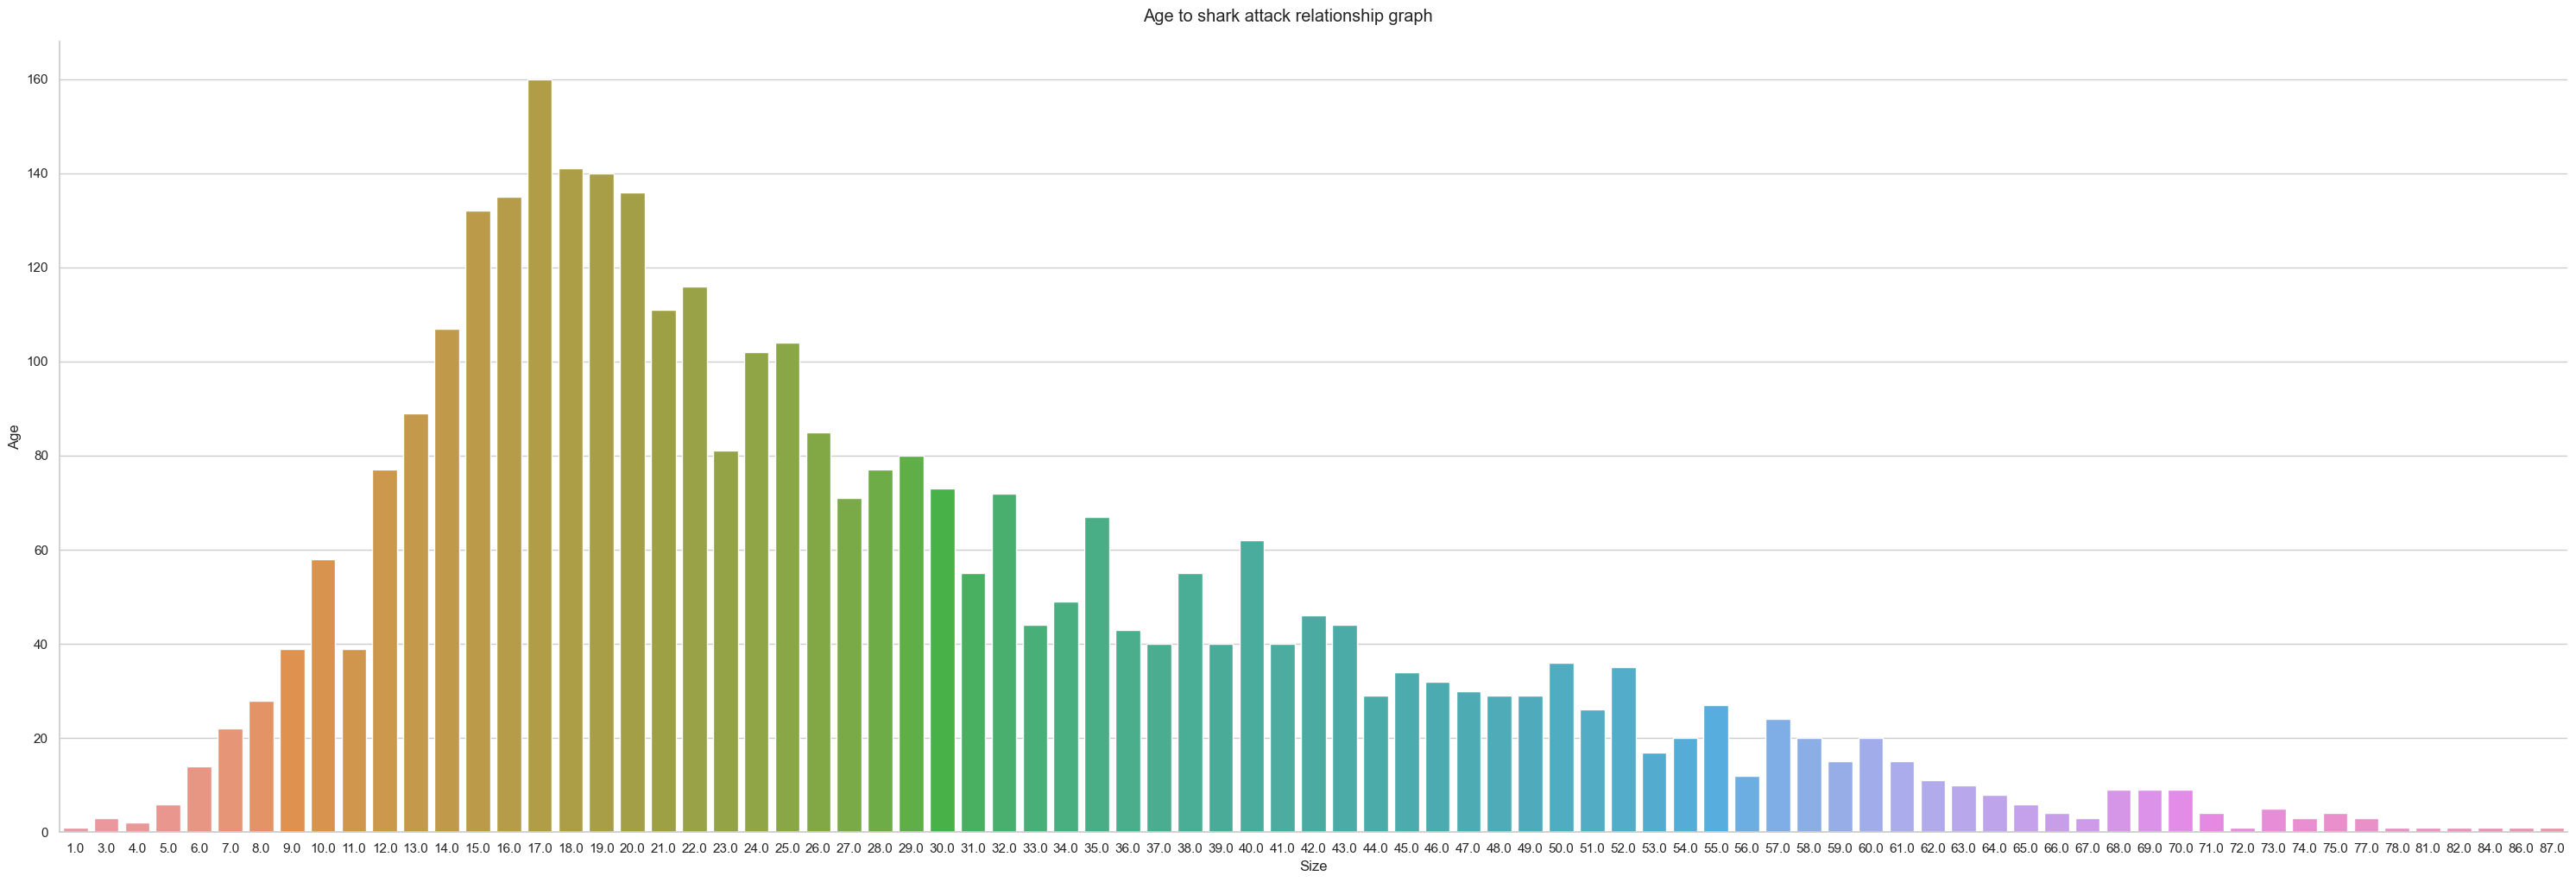

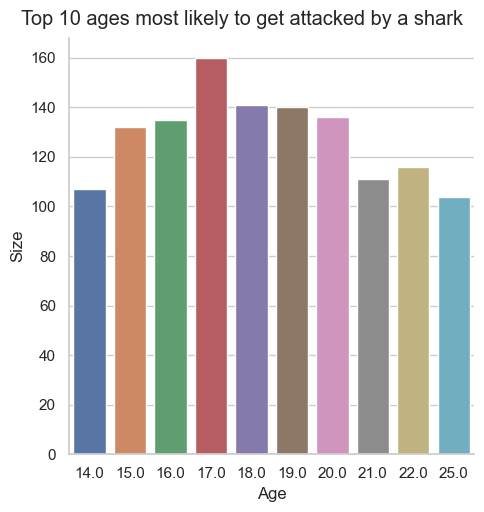

In [74]:
def df_hypothesis_age(df_input):
    df = df_input.copy()
    grouped_age = df.groupby('age') #We group by age
    grouped_age_size = grouped_age.size().sort_values(ascending= False) #We use the size method to see the frequency of each element in the column
    dataframe_age = grouped_age_size.reset_index(name='size') #We create a new dataframe to see the results better
    sns.set(style="whitegrid")

    # Plotting the bar plot using catplot for better control over figure size
    age_chart = sns.catplot(
        x="age", 
        y="size", 
        data=dataframe_age, 
        kind='bar',
        height=10,      # Height of the plot
        aspect=3       # Aspect ratio (width/height)
    )
    # Set the axis labels and title

    age_chart.set_axis_labels("Size", "Age")
    age_chart.fig.suptitle("Age to shark attack relationship graph", y=1.02)

    # Plotting a smaller version of the graph with the most relevant numbers
    age_chart2 = sns.catplot(
        x="age", 
        y="size", 
        data=dataframe_age.head(10), 
        kind='bar',
        height=5,      # Height of the plot
        aspect=1       # Aspect ratio (width/height)
    )
    # Set the axis labels and title
    age_chart2.set_axis_labels("Age", "Size")
    age_chart2.fig.suptitle("Top 10 ages most likely to get attacked by a shark", y=1.02)
        
    return dataframe_age.head(10), age_chart, age_chart2

age_df = df_hypothesis_age(format_df)

display(age_df)

2- We also must check which sex tends to be attacked more frequently and graph it. Moreover, we want to display a table that shows the relationship between age and sex.

,sex,size
0,M,2999
1,F,503
2,other,1


<Axes: title={'center': 'Shark attacks by sex'}, xlabel='Sex', ylabel='Size'>

,age,sex,size
0,17.0,M,143
1,18.0,M,125
2,19.0,M,123
3,20.0,M,121
4,16.0,M,120
5,15.0,M,109
6,22.0,M,101
7,25.0,M,101
8,24.0,M,95
9,21.0,M,92


(None, None, None)

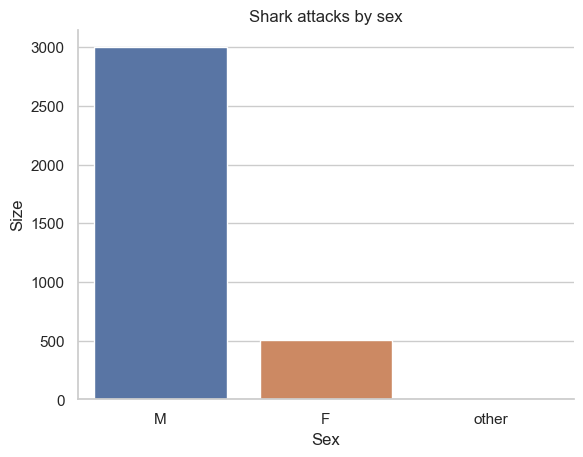

In [75]:
def df_hypothesis_sex(df_input):
    df = df_input.copy()
    grouped_sex = df.groupby('sex')
    grouped_sex_size = grouped_sex.size().sort_values(ascending= False)
    dataframe_sex = grouped_sex_size.reset_index(name='size')

    sns.set(style="whitegrid")
    sex_graph = sns.barplot(x="sex", y="size", data=dataframe_sex)
    sex_graph.set(xlabel='Sex', ylabel='Size', title='Shark attacks by sex')
    sns.despine()

    grouped_age_sex = df.groupby(["age", "sex"]) 
    grouped_age_sex_size = grouped_age_sex.size().sort_values(ascending= False)
    dataframe_age_sex = grouped_age_sex_size.reset_index(name='size') #We create a new dataframe to see the results better
    pd.set_option('display.max_rows', None)

    return display(dataframe_sex), display(sex_graph), display(dataframe_age_sex.head(50))#We want to see the 50 most common ages

sex_df = df_hypothesis_sex(format_df)
display(sex_df)

3 - We also want to determine which activities are the most dangerous.

,activity,size
0,Surfing,848
1,Swimming,622
2,Spearfishing,223
3,Fishing,145
4,Wading,128
5,Standing,87
6,Snorkeling,87
7,Body boarding,60
8,Diving,51
9,Scuba diving,51


(None, None)

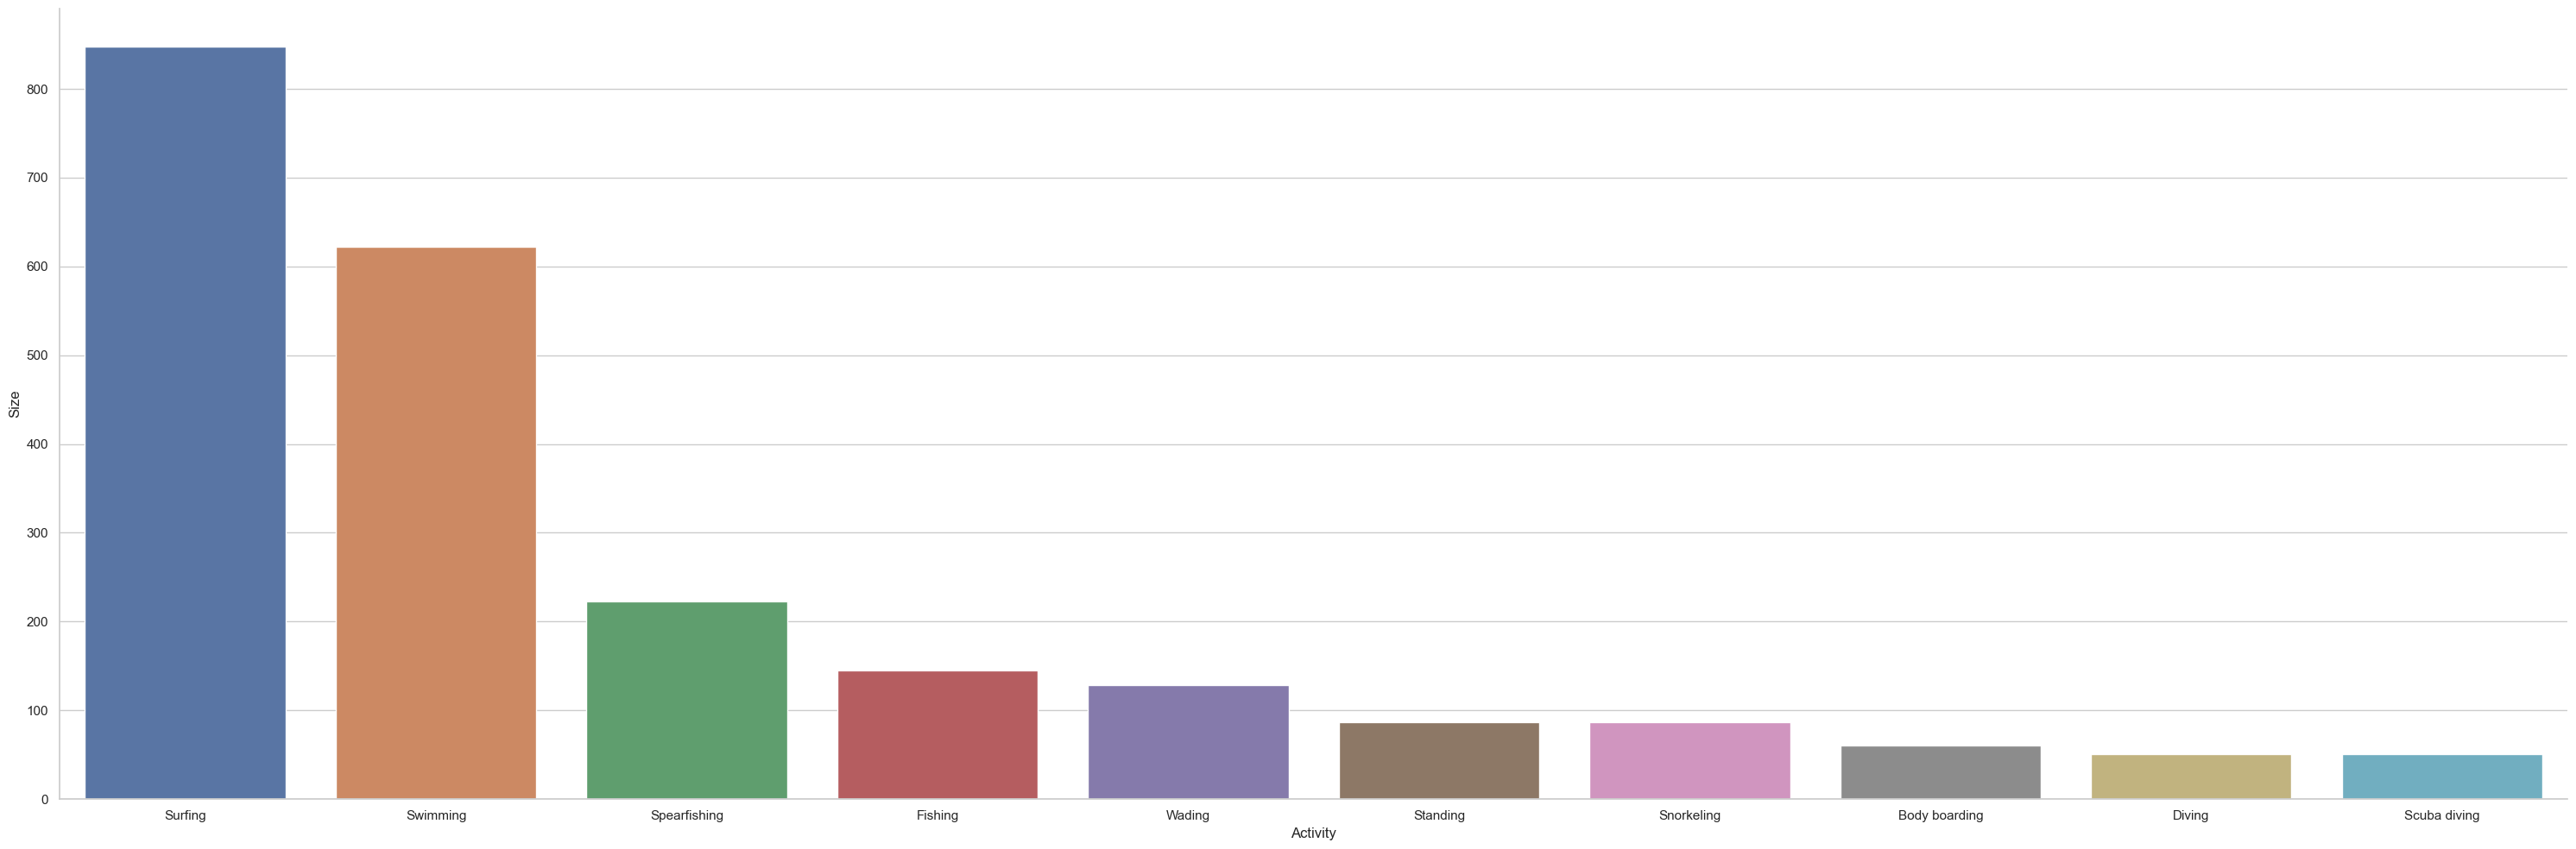

In [76]:

def df_hypothesis_activity(df_input):
    df = df_input.copy()
    grouped_activity = df.groupby("activity")
    sorted_group_sizes = grouped_activity.size().sort_values(ascending=False)
    dataframe_activity = sorted_group_sizes.reset_index(name='size')
    pd.set_option('display.max_rows', None)
    
    activity_graph = sns.catplot(
    x="activity", 
    y="size", 
    data=dataframe_activity.head(10), 
    kind='bar',
    height=10,      # Height of the plot
    aspect=3      # Aspect ratio (width/height)
    )
    # Set the axis labels and title
    activity_graph.set_axis_labels("Activity", "Size")

    return display(dataframe_activity.head(25)), display(activity_graph)

activity_df = df_hypothesis_activity(format_df)
display(activity_df)

4 - Determine which countries and states have had the most shark attacks.

,country,size
0,USA,1615
1,AUSTRALIA,763
2,SOUTH AFRICA,357
3,BAHAMAS,71
4,BRAZIL,68
5,NEW ZEALAND,53
6,MEXICO,38
7,REUNION,34
8,PAPUA NEW GUINEA,33
9,NEW CALEDONIA,28


,state,size
0,Florida,876
1,New South Wales,297
2,California,202
3,Queensland,201
4,Hawaii,162
5,KwaZulu-Natal,132
6,Western Australia,111
7,Eastern Cape Province,111
8,Western Cape Province,108
9,South Carolina,99


None

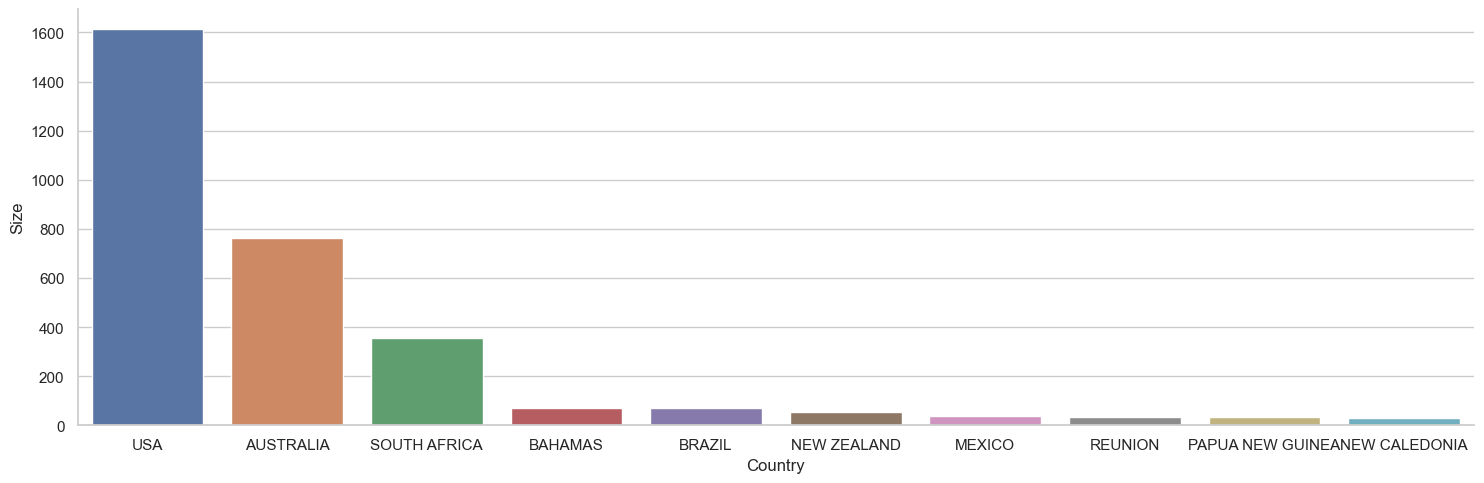

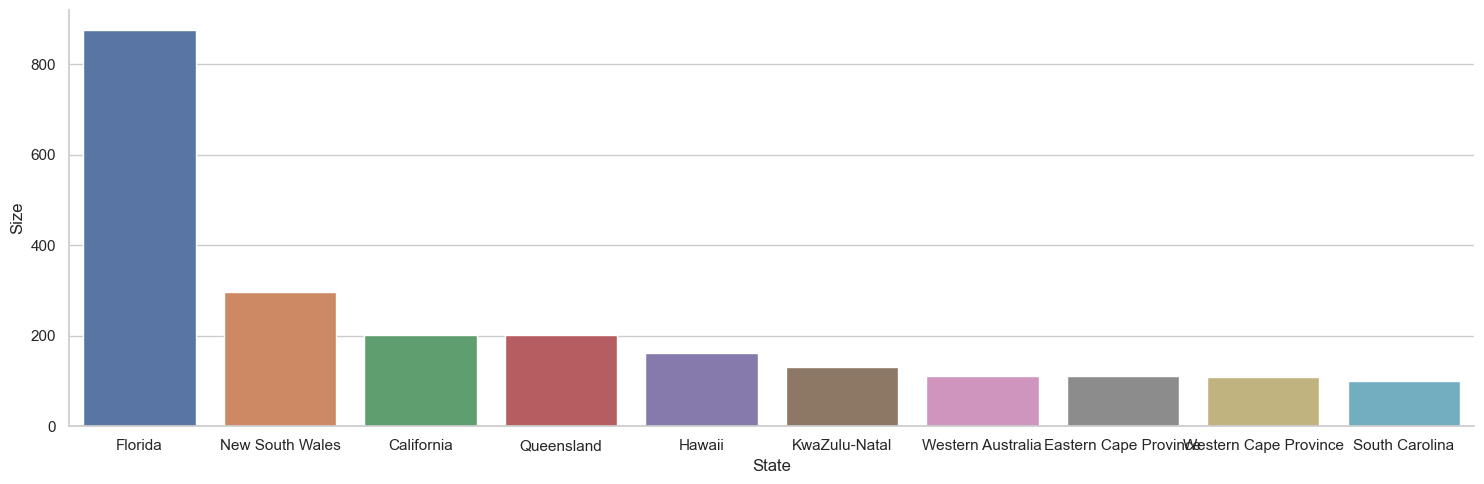

In [77]:
def df_hypothesis_country_state(df_input):
    df = df_input.copy()
    #countries
    grouped_country = df.groupby('country') 
    grouped_country_size = grouped_country.size().sort_values(ascending= False)
    dataframe_country = grouped_country_size.reset_index(name='size') 
    pd.set_option('display.max_rows', None)
    
    #countries graph
    sns.set(style="whitegrid")
    country_graph = sns.catplot(
        x="country", 
        y="size", 
        data=dataframe_country.head(10), 
        kind='bar',
        height=5,      
        aspect=3 
    )
    country_graph.set_axis_labels("Country", "Size")

    #states
    grouped_state = df.groupby('state') 
    grouped_state_size = grouped_state.size().sort_values(ascending= False)
    dataframe_state = grouped_state_size.reset_index(name='size') 
    pd.set_option('display.max_rows', None)

    #states graph
    sns.set(style="whitegrid")
    state_graph = sns.catplot(
        x="state", 
        y="size", 
        data=dataframe_state.head(10), 
        kind='bar',
        height=5,      
        aspect=3 
    )
    state_graph.set_axis_labels("State", "Size")

    return display(dataframe_country.head(50),dataframe_state.head(50), country_graph, state_graph)

country_state_df = df_hypothesis_country_state(format_df)
display(country_state_df)  



5- Determining the most common injuries and graphing them

,injury,size
0,FATAL,321
1,Foot bitten,64
2,Left foot bitten,50
3,Leg bitten,40
4,Right foot bitten,31
5,No injury,25
6,"No injury, board bitten",22
7,Calf bitten,18
8,Lacerations to foot,17
9,Foot lacerated,17


None

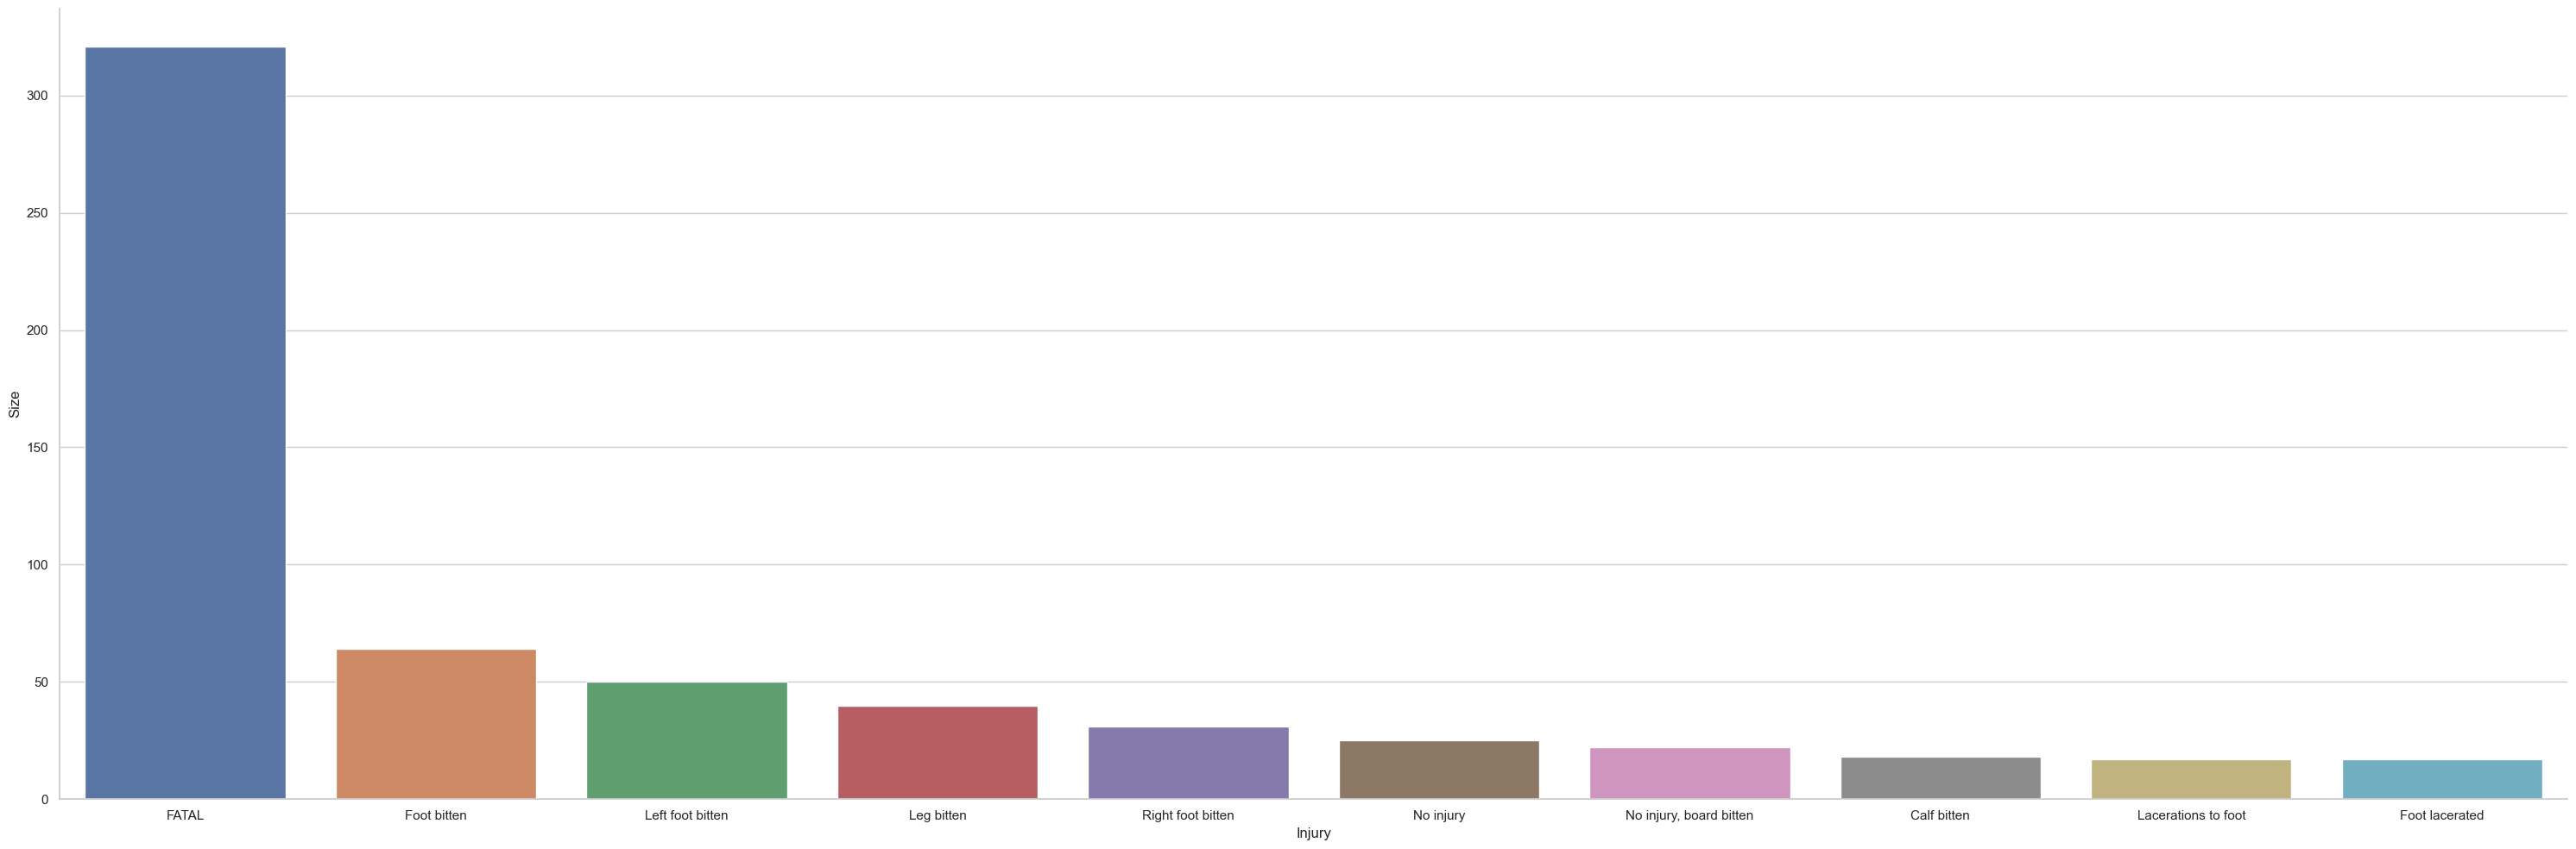

In [78]:
def df_hypothesis_injury(df_input):
    df = df_input.copy()
    grouped_injury = df.groupby('injury') 
    grouped_injury_size = grouped_injury.size().sort_values(ascending= False)
    dataframe_injury = grouped_injury_size.reset_index(name='size') 
    pd.set_option('display.max_rows', None)

    sns.set(style="whitegrid")
    injury_graph = sns.catplot(
        x="injury", 
        y="size", 
        data=dataframe_injury.head(10), 
        kind='bar',
        height=10,      
        aspect=3 )
    injury_graph.set_axis_labels("Injury", "Size")
    
    return display(dataframe_injury.head(50), injury_graph)

injury_df = df_hypothesis_injury(format_df)
display(injury_df)   

5(3) - Create a table that show what countries and states have had the most fatal attacks.

In [79]:
def df_hypothesis_fatal(df_input):
    df = df_input.copy()
    fatal_attacks = df[df["injury"] == "FATAL"] #We create a data frame that only contains rows with attacks that were FATAL

    grouped_inj_state_country = fatal_attacks.groupby(['injury', 'country', "state"])
    sorted_group_sizes = grouped_inj_state_country.size().sort_values(ascending=False)
    dataframe_inj_state_country = sorted_group_sizes.reset_index(name='size')
    pd.set_option('display.max_rows', None)
    
    return display(dataframe_inj_state_country.head(50))

fatal_df = df_hypothesis_fatal(format_df)
display(fatal_df)



,injury,country,state,size
0,FATAL,AUSTRALIA,Queensland,29
1,FATAL,AUSTRALIA,New South Wales,26
2,FATAL,AUSTRALIA,Western Australia,19
3,FATAL,AUSTRALIA,South Australia,12
4,FATAL,SOUTH AFRICA,Western Cape Province,12
5,FATAL,BRAZIL,Pernambuco,11
6,FATAL,SOUTH AFRICA,Eastern Cape Province,11
7,FATAL,USA,Florida,9
8,FATAL,USA,California,7
9,FATAL,USA,Hawaii,6


None

5(4) - Create a table that shows injuries per country/state

In [80]:
def df_hypothesis_injury_country_state(df_input):
    df = df_input.copy()

    grouped_inj_state_country = df.groupby(['injury', 'country', "state"])
    sorted_group_sizes = grouped_inj_state_country.size().sort_values(ascending=False)
    dataframe_inj_state_country = sorted_group_sizes.reset_index(name='size')
    pd.set_option('display.max_rows', None)

    return display(dataframe_inj_state_country.head(50))

df_injury_country_state_df = df_hypothesis_injury_country_state(format_df)
display(df_injury_country_state_df)


,injury,country,state,size
0,Foot bitten,USA,Florida,34
1,Left foot bitten,USA,Florida,30
2,FATAL,AUSTRALIA,Queensland,29
3,FATAL,AUSTRALIA,New South Wales,26
4,Right foot bitten,USA,Florida,22
5,FATAL,AUSTRALIA,Western Australia,19
6,FATAL,AUSTRALIA,South Australia,12
7,FATAL,SOUTH AFRICA,Western Cape Province,12
8,Lacerations to foot,USA,Florida,12
9,FATAL,SOUTH AFRICA,Eastern Cape Province,11


None

6 - Lastly, it is important to analyze the type of attacks.

In [81]:
def df_hypothesis_type(df_input):
    df = df_input.copy()

    grouped_type = df.groupby('type') 
    grouped_type_size = grouped_type.size().sort_values(ascending= False)
    dataframe_type = grouped_type_size.reset_index(name='size') 
    pd.set_option('display.max_rows', None)
    
    return display(dataframe_type) 

df_type = df_hypothesis_type(format_df)
display(df_type)


,type,size
0,Unprovoked,2950
1,Provoked,275
2,Unconfirmed,217
3,Watercraft,45
4,Sea Disaster,40


None